In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### Load data

### Output descriptive statistics

In [50]:
df = pd.read_csv("res/data.tsv",sep='\t')
df.head()

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


In [51]:
rename_dic = dict(zip(df.columns, 
                      ['school_name', 'school_type', 'sat', 
                       'acceptance', 'money_per_student', 
                       'top', 'phd', 'graduate']))
df.rename(columns=rename_dic, inplace=True)
df.school_type = df.school_type.map({'Lib Arts': 0, 'Univ': 1})

df.describe()

,school_type,sat,acceptance,money_per_student,top,phd,graduate
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.500000,1263.960000,37.840000,30247.200000,74.440000,90.560000,83.480000
std,0.505076,62.329591,13.363612,15266.172682,13.515162,8.258972,7.557237
min,0.000000,1109.000000,17.000000,17520.000000,47.000000,58.000000,61.000000
25%,0.000000,1225.000000,25.750000,20182.250000,65.000000,86.250000,77.250000
50%,0.500000,1264.000000,36.000000,24994.500000,76.500000,93.000000,85.500000
75%,1.000000,1304.500000,47.750000,36803.750000,85.000000,97.750000,89.000000
max,1.000000,1400.000000,67.000000,102262.000000,98.000000,100.000000,95.000000


In [52]:
df = df[['school_type', 'sat', 'acceptance', 'money_per_student', 'top', 'phd', 'graduate']]
df.head()

,school_type,sat,acceptance,money_per_student,top,phd,graduate
0,0,1315,22,26636,85,81,93
1,0,1310,24,27487,78,93,88
2,0,1336,28,23772,86,90,93
3,0,1300,24,25703,78,95,90
4,0,1250,49,27879,76,91,86


count      50.000000
mean     1263.960000
std        62.329591
min      1109.000000
25%      1225.000000
50%      1264.000000
75%      1304.500000
max      1400.000000
Name: sat, dtype: float64


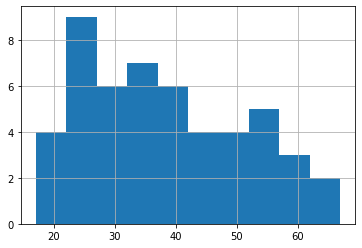

In [53]:
print(df.sat.describe())
df.acceptance.hist()

count    50.000000
mean     37.840000
std      13.363612
min      17.000000
25%      25.750000
50%      36.000000
75%      47.750000
max      67.000000
Name: acceptance, dtype: float64


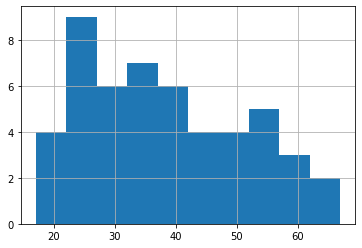

In [54]:
print(df.acceptance.describe())
df.acceptance.hist()

count    50.000000
mean     37.840000
std      13.363612
min      17.000000
25%      25.750000
50%      36.000000
75%      47.750000
max      67.000000
Name: acceptance, dtype: float64


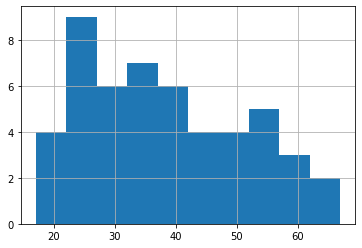

In [55]:
print(df.acceptance.describe())
df.acceptance.hist()

count        50.000000
mean      30247.200000
std       15266.172682
min       17520.000000
25%       20182.250000
50%       24994.500000
75%       36803.750000
max      102262.000000
Name: money_per_student, dtype: float64


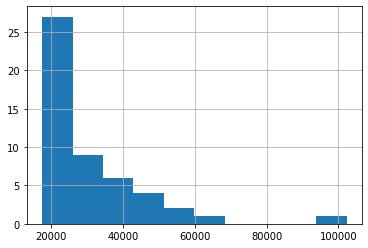

In [56]:
print(df.money_per_student.describe())
df.money_per_student.hist()
# sns.boxplot(df.money_per_student)

count     50.000000
mean      90.560000
std        8.258972
min       58.000000
25%       86.250000
50%       93.000000
75%       97.750000
max      100.000000
Name: phd, dtype: float64


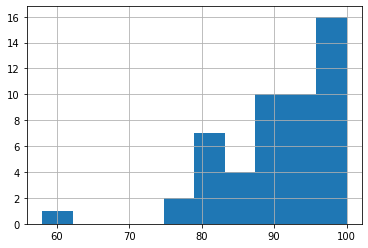

In [57]:
print(df.phd.describe())
df.phd.hist()

count    50.000000
mean     74.440000
std      13.515162
min      47.000000
25%      65.000000
50%      76.500000
75%      85.000000
max      98.000000
Name: top, dtype: float64


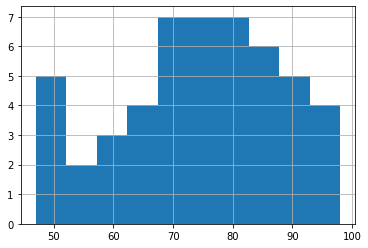

In [58]:
print(df.top.describe())
df.top.hist()

count    50.000000
mean     83.480000
std       7.557237
min      61.000000
25%      77.250000
50%      85.500000
75%      89.000000
max      95.000000
Name: graduate, dtype: float64


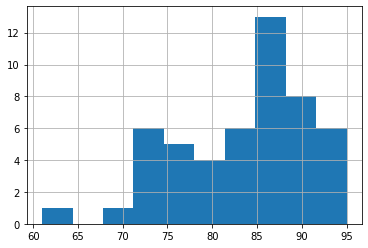

In [59]:
print(df.graduate.describe())
df.graduate.hist()

### Find anomalies

In [60]:
def find_anomalies(data):
    anomalies = []

    data_std = np.std(data)
    data_mean = np.mean(data)
    three_sigma = data_std * 3
    
    lower_limit  = data_mean - three_sigma 
    upper_limit = data_mean + three_sigma


    for point in data:
        if point > upper_limit or point < lower_limit:
            anomalies.append(point)
    return anomalies

In [61]:
for key in df.keys():
    try:
        if find_anomalies(df[key]):
            print(key, find_anomalies(df[key]))
        else:
            print(key, 'Not anomalies')
    except:
        continue

school_type Not anomalies
sat Not anomalies
acceptance Not anomalies
money_per_student [102262]
top Not anomalies
phd [58]
graduate [61]


In [62]:
def plot_without_anomalies(df, key):
    outlier = find_anomalies(df[key])
    new_df = df[~df[key].isin(outlier)][key]
    print(new_df.describe())
    new_df.hist()

count       49.000000
mean     28777.510204
std      11298.759661
min      17520.000000
25%      20179.000000
50%      24718.000000
75%      35804.000000
max      61921.000000
Name: money_per_student, dtype: float64


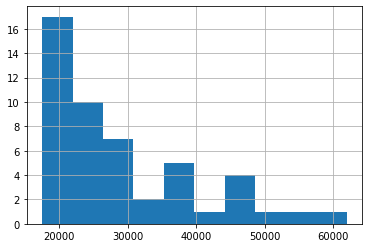

In [63]:
plot_without_anomalies(df, 'money_per_student')

count    49.000000
mean     83.938776
std       6.896280
min      68.000000
25%      78.000000
50%      86.000000
75%      89.000000
max      95.000000
Name: graduate, dtype: float64


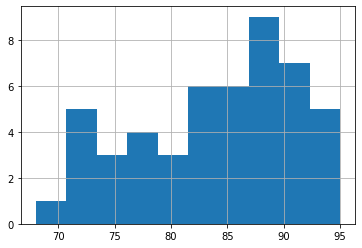

In [64]:
plot_without_anomalies(df, 'graduate')

count     49.000000
mean      91.224490
std        6.862535
min       75.000000
25%       87.000000
50%       93.000000
75%       98.000000
max      100.000000
Name: phd, dtype: float64


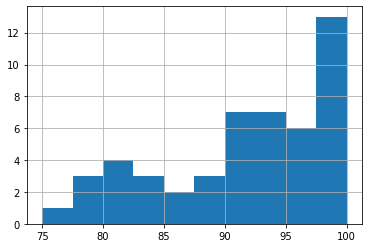

In [65]:
plot_without_anomalies(df, 'phd')

### Visualization and explain correlations

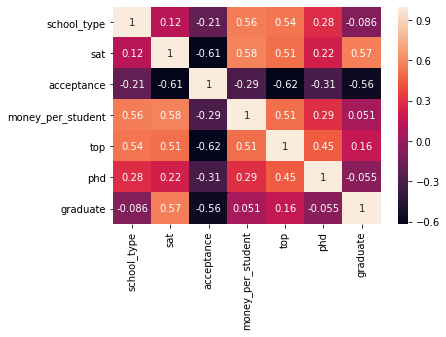

In [66]:
sns.heatmap(df.corr(), annot=True)

ВЫВОДЫ
- чем выше SAT тем больший процент учащихся оканчивают оброзовательное учреждение
- учащиеся с высоким SAT выбирают дорогостоещее образвоание


- наличе большого кол-ва преподавателей с PHD не влияет на конечное чило студентов, которые закончат ВУЗ
- чем строже отбор в ВУЗ тем большее кол-во учищихся его закончит



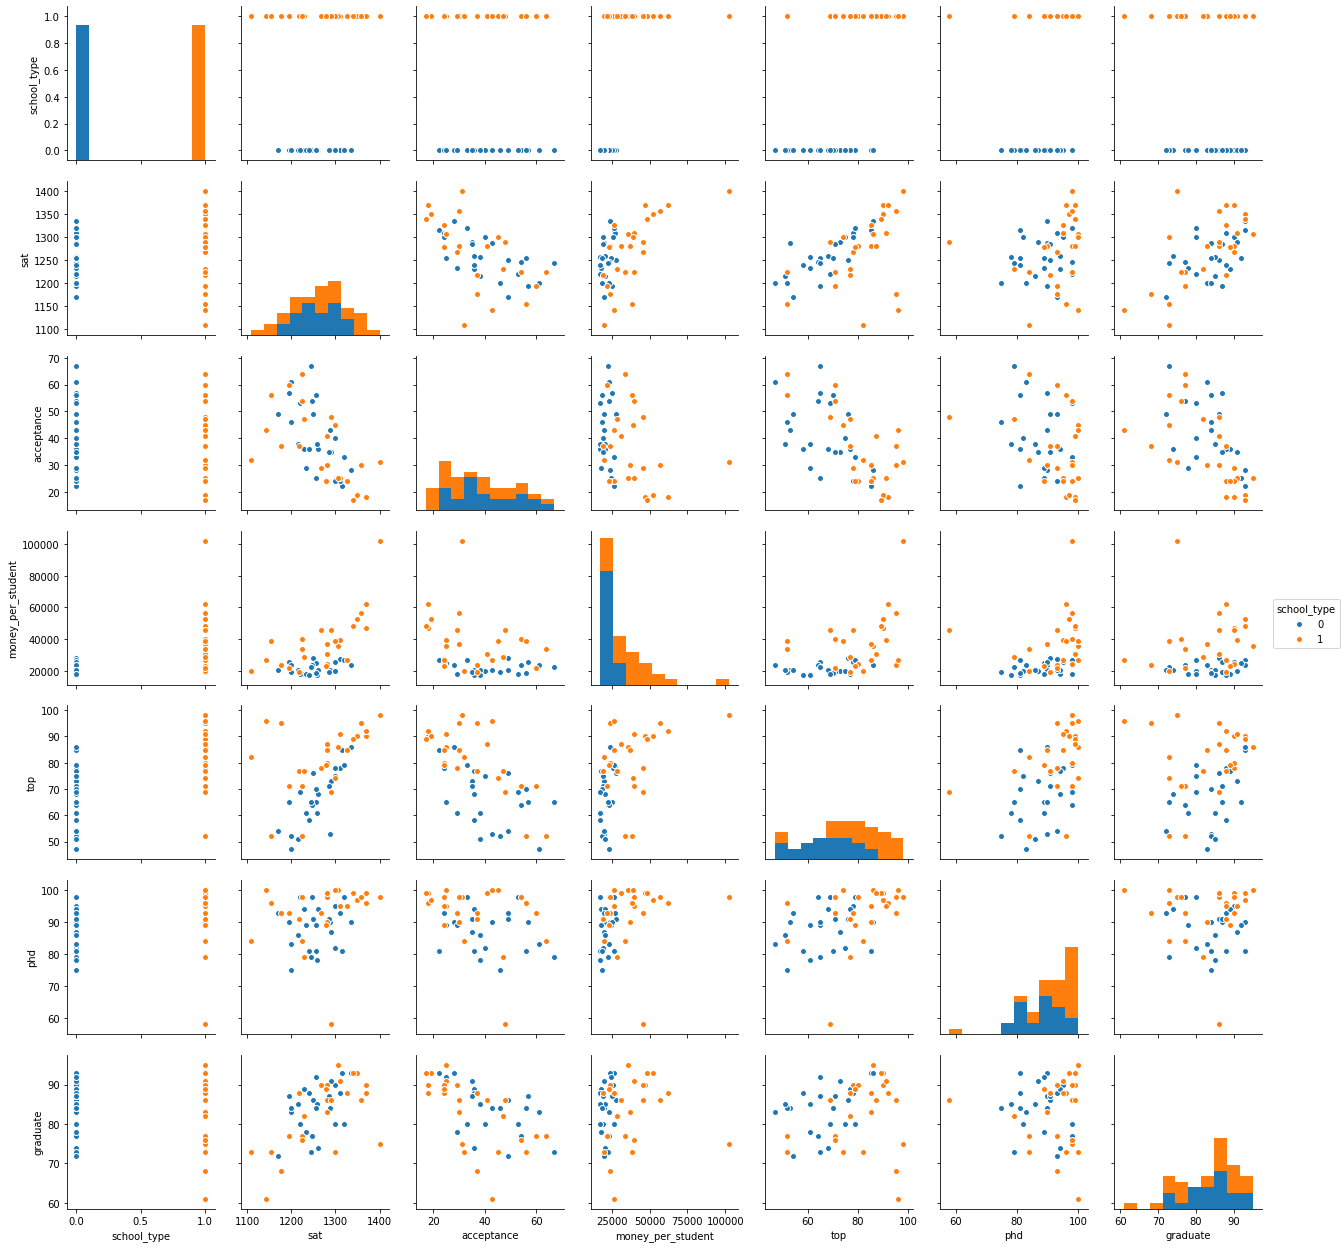

In [69]:
sns.pairplot(hue='school_type', data=df)

Рассмотрим данные в разрезе school_type

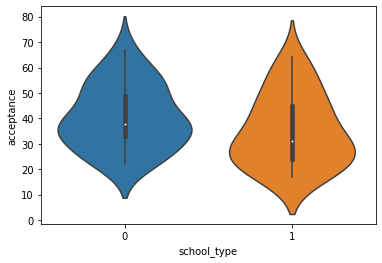

In [21]:
sns.violinplot(x ='school_type', y = 'acceptance', data=df)

Тип Вуза не влияет на кол-во принятых заявок, но в среднем в Univ рассматривают менешее кол-во заявок 

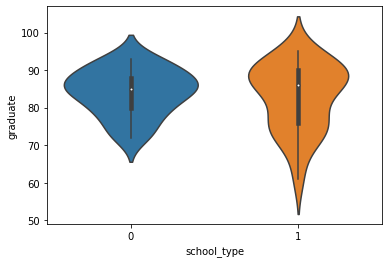

In [22]:
sns.violinplot(x ='school_type', y = 'graduate', data=df)

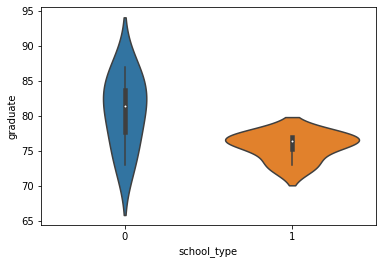

In [23]:
sns.violinplot(x ='school_type', y = 'graduate', data=df[(df.acceptance > 50)])

Если в Univ рассматривают больше 50% заявок то как правило меньшее кол-во вупыскников заканчивает ВУЗ

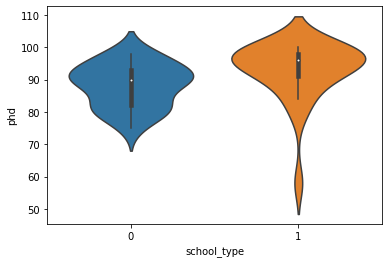

In [24]:
sns.violinplot(x ='school_type', y = 'phd', data=df)

In [25]:
df[(df.phd < 75)]

,school_type,sat,acceptance,money_per_student,top,phd,graduate
39,1,1290,48,45460,69,58,86


Выброс

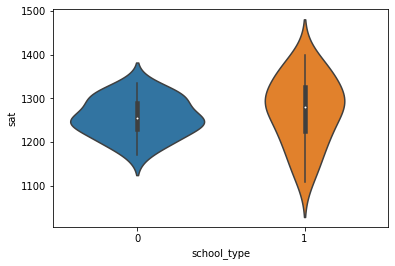

In [26]:
sns.violinplot(x ='school_type', y = 'sat', data=df)

Тип школы не сильно влияет на SAT

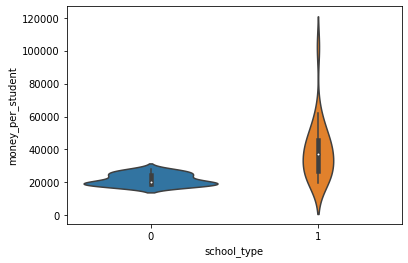

In [27]:
sns.violinplot(x ='school_type', y = 'money_per_student', data=df)

In [28]:
df[(df.money_per_student > 65000)]

,school_type,sat,acceptance,money_per_student,top,phd,graduate
29,1,1400,31,102262,98,98,75


Выброс

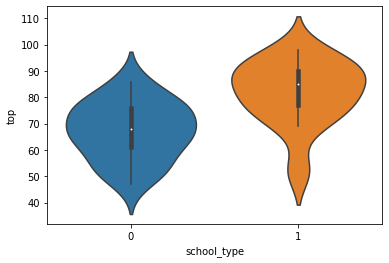

In [29]:
sns.violinplot(x='school_type', y= 'top', data=df)

Больший процент поступающих в Univ уже в школе имели хорошую успеваемость и попадали в top 10% в своих школах

In [30]:
df[(df.top < 70) & (df.school_type == 1)]

,school_type,sat,acceptance,money_per_student,top,phd,graduate
39,1,1290,48,45460,69,58,86
46,1,1225,64,33607,52,84,77
49,1,1155,56,38597,52,96,73


Выбросы

## Task 2

### A, n = 40

count    1000.000000
mean      149.913644
std         2.079149
min       143.975642
25%       148.437945
50%       149.926967
75%       151.358253
max       155.913081
dtype: float64


/Users/perhunivan/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


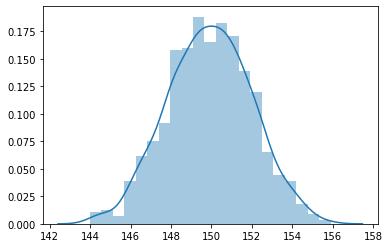

In [32]:
a = np.random.normal(loc= 150, scale=10, size= 25)
b = np.random.normal(loc= 150, scale=10, size= 15)
c = np.random.normal(loc= 150, scale=10, size= 10)

res = []
for i in a:
    res.append({'type': 'male', 'height': i})
for i in b:
    res.append({'type': 'famale', 'height': i})
for i in c:
    res.append({'type': 'kind', 'height': i})
mix_data = pd.DataFrame(res)

# sns.distplot(mix_data.height)

res = []
for i in range(1000):
    a = np.random.choice(mix_data.height, 30)
    res.append(np.mean(a))
print(pd.Series(res).describe())
sns.distplot(res)


### A, n = 500

count    1000.000000
mean      150.179907
std         0.407008
min       148.943090
25%       149.918468
50%       150.174625
75%       150.462231
max       151.417546
dtype: float64


/Users/perhunivan/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


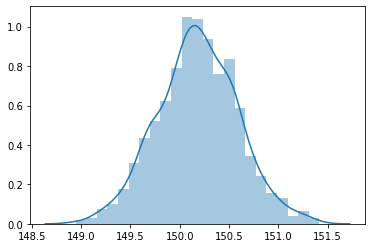

In [39]:
a = np.random.normal(loc= 150, scale=10, size= 100)
b = np.random.normal(loc= 150, scale=10, size= 250)
c = np.random.normal(loc= 150, scale=10, size= 250)

res = []
for i in a:
    res.append({'type': 'male', 'height': i})
for i in b:
    res.append({'type': 'famale', 'height': i})
for i in c:
    res.append({'type': 'kind', 'height': i})
mix_data = pd.DataFrame(res)

# sns.distplot(mix_data.height)

res = []
for i in range(1000):
    a = np.random.choice(mix_data.height, 600)
    res.append(np.mean(a))
print(pd.Series(res).describe())
sns.distplot(res)


### Б, n = 40

count    1000.000000
mean      150.236332
std         6.132856
min       130.758798
25%       146.320484
50%       150.352008
75%       154.318282
max       168.073661
dtype: float64


/Users/perhunivan/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


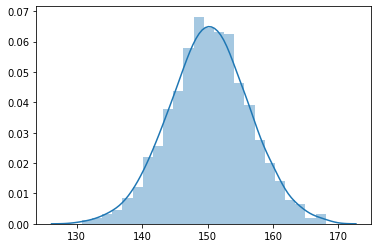

In [35]:
a = np.random.normal(loc= 150, scale=30, size= 5)
b = np.random.normal(loc= 150, scale=50, size= 15)
c = np.random.normal(loc= 150, scale=10, size= 20)

res = []
for i in a:
    res.append({'type': 'male', 'height': i})
for i in b:
    res.append({'type': 'famale', 'height': i})
for i in c:
    res.append({'type': 'kind', 'height': i})
mix_data = pd.DataFrame(res)

# sns.distplot(mix_data.height)

res = []
for i in range(1000):
    a = np.random.choice(mix_data.height, 30)
    res.append(np.mean(a))
print(pd.Series(res).describe())
sns.distplot(res)


### Б, n = 500

count    1000.000000
mean      149.359999
std         6.705232
min       125.651391
25%       144.805352
50%       149.570858
75%       153.947474
max       171.341017
dtype: float64


/Users/perhunivan/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


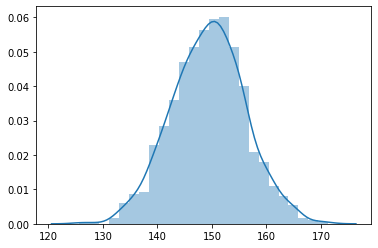

In [36]:
a = np.random.normal(loc= 150, scale=30, size= 100)
b = np.random.normal(loc= 150, scale=50, size= 250)
c = np.random.normal(loc= 150, scale=10, size= 250)

res = []
for i in a:
    res.append({'type': 'male', 'height': i})
for i in b:
    res.append({'type': 'famale', 'height': i})
for i in c:
    res.append({'type': 'kind', 'height': i})
mix_data = pd.DataFrame(res)

# sns.distplot(mix_data.height)

res = []
for i in range(1000):
    a = np.random.choice(mix_data.height, 30)
    res.append(np.mean(a))
print(pd.Series(res).describe())
sns.distplot(res)


### В, n = 40

count    1000.000000
mean      171.340459
std         7.533998
min       143.774295
25%       166.205874
50%       171.660636
75%       176.496300
max       191.630600
dtype: float64


/Users/perhunivan/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


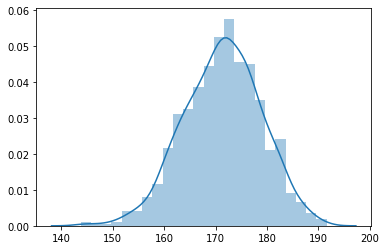

In [37]:
a = np.random.normal(loc= 110, scale=30, size= 5)
b = np.random.normal(loc= 150, scale=50, size= 15)
c = np.random.normal(loc= 180, scale=10, size= 20)

res = []
for i in a:
    res.append({'type': 'male', 'height': i})
for i in b:
    res.append({'type': 'famale', 'height': i})
for i in c:
    res.append({'type': 'kind', 'height': i})
mix_data = pd.DataFrame(res)

# sns.distplot(mix_data.height)

res = []
for i in range(1000):
    a = np.random.choice(mix_data.height, 30)
    res.append(np.mean(a))
print(pd.Series(res).describe())
sns.distplot(res)


count    1000.000000
mean      155.917498
std         6.949881
min       131.465590
25%       151.182440
50%       156.102228
75%       160.982766
max       174.718711
dtype: float64


/Users/perhunivan/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


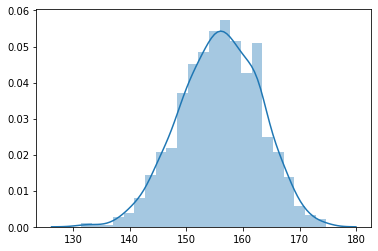

In [38]:
a = np.random.normal(loc= 110, scale=30, size= 100)
b = np.random.normal(loc= 150, scale=50, size= 150)
c = np.random.normal(loc= 180, scale=10, size= 250)

res = []
for i in a:
    res.append({'type': 'male', 'height': i})
for i in b:
    res.append({'type': 'famale', 'height': i})
for i in c:
    res.append({'type': 'kind', 'height': i})
mix_data = pd.DataFrame(res)

# sns.distplot(mix_data.height)

res = []
for i in range(1000):
    a = np.random.choice(mix_data.height, 30)
    res.append(np.mean(a))
print(pd.Series(res).describe())
sns.distplot(res)


## Task 4.2

In [536]:
import requests

r = requests.get('http://www.statsci.org/data/oz/carprefs.txt').text
data = [x.split('\t') for x in r.split('\n')]

df = pd.DataFrame.from_records(data[1:], columns=data[0]).dropna()
for key in df.keys():
    df[key] = df[key].astype(int)

Для каждого из признаков мы проверяем гипотезу 

Нет разницы в важности признака между муж. и жен.

In [568]:
feature = ['LicYr', 'LicMth', 'ActCar', 'Kids5', 'Kids6',
       'PreferCar', 'Car15K', 'Reason', 'Cost', 'Reliable', 'Perform', 'Fuel',
       'Safety', 'AC/PS', 'Park', 'Room', 'Doors', 'Prestige', 'Colour']


for f in feature:
    ct = pd.crosstab(df.Sex, df[f])
    chi, p_value, dof, d, = scipy.stats.chi2_contingency(ct)
    if p_value < 0.05:
        print('Feature {0}'.format(f))


Feature PreferCar
Feature Car15K
Feature Reason
Feature Cost
Feature Reliable
Feature Perform
Feature Fuel
Feature Safety
Feature AC/PS
Feature Park


Вывод:

Среди 22 признаков различия в выборе автомобиля у мужчин и женщин сущетсвуют только по этим признакам

## Task 4.1

In [95]:
df = pd.read_csv('res/brain.tsv', sep = '\t')
df.info(), df.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
Gender       40 non-null object
FSIQ         40 non-null int64
VIQ          40 non-null int64
PIQ          40 non-null int64
Weight       40 non-null object
Height       40 non-null object
MRI_Count    40 non-null int64
dtypes: int64(4), object(3)
memory usage: 2.3+ KB


(None,
 Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object'))

- интеллектуальные коэффициенты (FSIQ),
- словесные интеллектуальные коэффициенты (VIQ) 
- интеллектуальные коэффициенты производительности (PIQ), 
- рост (Weight)
- вес (Height)
- размер мозга людей (MRI_Count)


In [96]:
df.head()


,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,�,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545


In [97]:
keys = ['FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count']
for k in keys:
    df[k] = pd.to_numeric(df[k], errors="coerce", downcast='float')



df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 39
Data columns (total 7 columns):
Gender       38 non-null object
FSIQ         38 non-null float32
VIQ          38 non-null float32
PIQ          38 non-null float32
Weight       38 non-null float32
Height       38 non-null float32
MRI_Count    38 non-null float32
dtypes: float32(6), object(1)
memory usage: 1.5+ KB


/Users/perhunivan/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


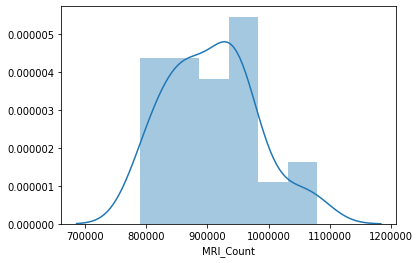

In [99]:
sns.distplot(df.MRI_Count)

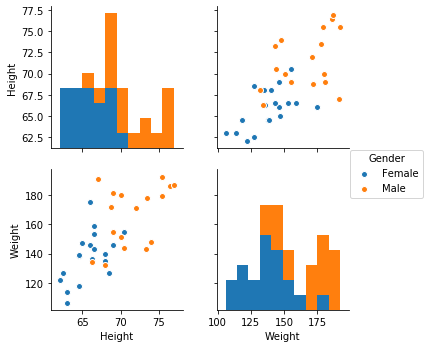

In [79]:
sns.pairplot(df[['Height', 'Weight', 'Gender']], hue= 'Gender')

Так как мужчины как правило больше женщин то скорее всего и мозг у них больше

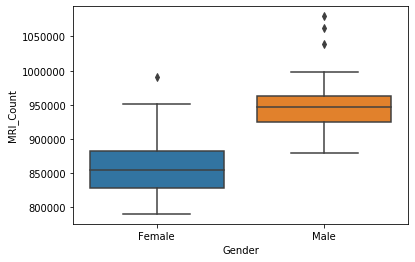

In [80]:
sns.boxplot(x = 'Gender', y = 'MRI_Count', data=df)

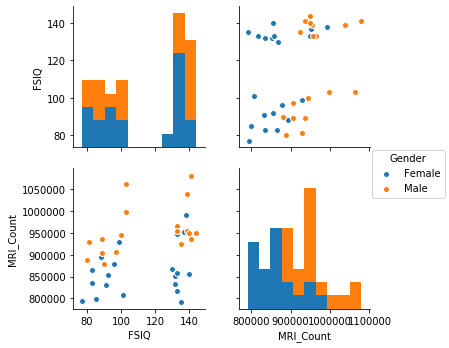

In [81]:
sns.pairplot(df[['FSIQ', 'MRI_Count', 'Gender']], hue= 'Gender')

Интересно, что существует явный разрывв между FSIQ в интервале 100-125

Можно явно выделить 2 группы людей

In [82]:
df_m = df[(df.Gender == 'Male')]
df_f = df[(df.Gender == 'Female')]
df_m.FSIQ.describe(), df_f.FSIQ.describe()

(count     18.000000
 mean     115.388885
 std       24.507235
 min       80.000000
 25%       91.750000
 50%      118.000000
 75%      139.000000
 max      144.000000
 Name: FSIQ, dtype: float64, count     20.000000
 mean     111.900002
 std       23.686327
 min       77.000000
 25%       90.250000
 50%      115.500000
 75%      133.000000
 max      140.000000
 Name: FSIQ, dtype: float64)

In [83]:
corr = df[['MRI_Count', 'FSIQ']].corr()
r= corr.MRI_Count['FSIQ']
t = (r * np.sqrt(len(df) - 3)) / (np.sqrt(1 - r**2))
t

2.0943358027912313

при alpha = 0,05 и f = 36 степеней свободы t_критич = 2,028
т. к. t > t_критич => нулевая гипотеза на уровне значимости α принимается

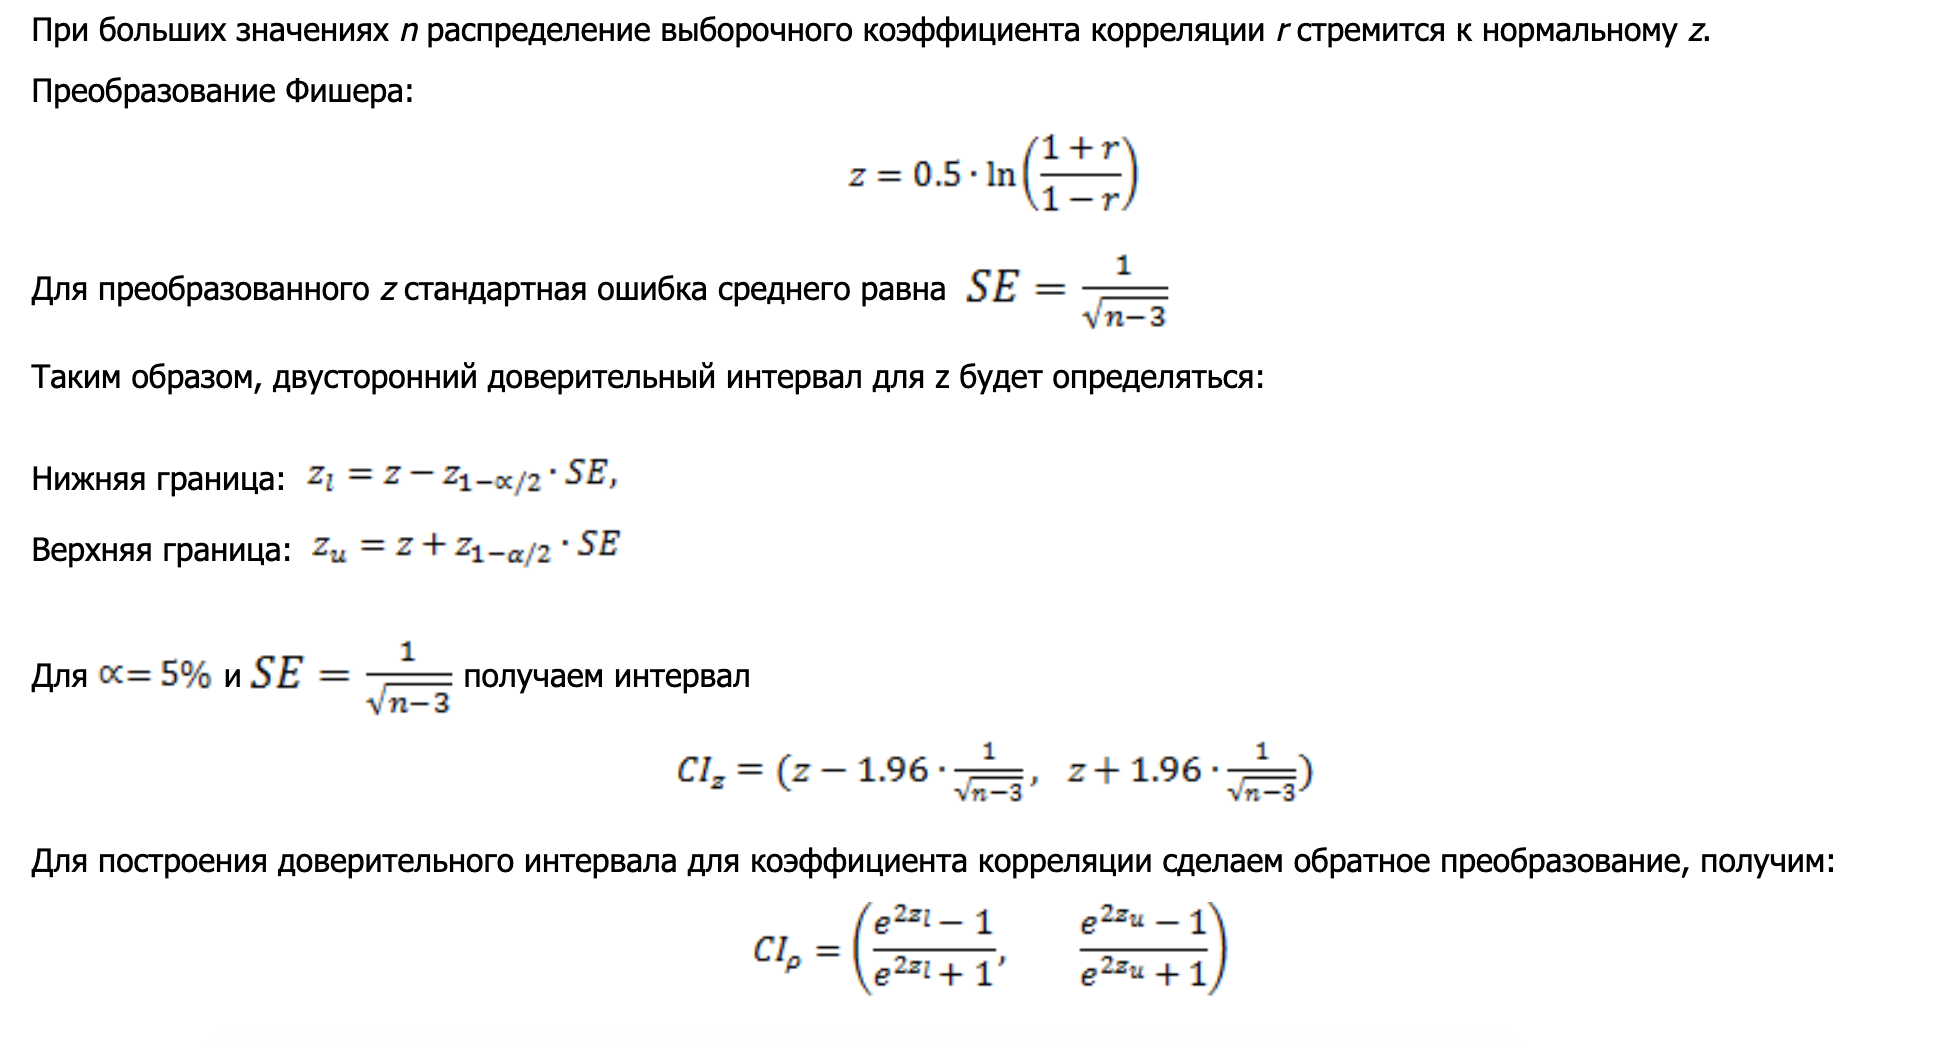

In [49]:
z = 0.5 * (np.log((1 + r)/(1 - r)))
SE = 1/(np.sqrt(len(df)- 3))
alpha = 1.96
z1 = z - alpha*(SE) 
z2 = z + alpha*(SE)
z1 = (np.exp(1)**(2*z1) - 1) / (np.exp(1)**(2*z1) + 1)
z2 = (np.exp(1)**(2*z2) - 1) / (np.exp(1)**(2*z2) + 1)
z1,z2

(0.015699810983747974, 0.5904144326581309)